# Regression

In [1]:
# Generate some noisy data

import numpy as np

# 100 random numbers from a uniform distribution X ~ U([0, 2])
X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1) # y = 3x + 4 + noise(~N(0,1))

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y');

### Linear regression using Scikit-Learn

In [3]:
# Load the LinearRegression class
from sklearn.linear_model import LinearRegression

# Instantiate a model
model = LinearRegression()

# Fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
# Get the fitted parameters
print('Fitted slope: {}'.format(model.coef_))
print('Fitted intercept: {}'.format(model.intercept_))

Fitted slope: [[3.05994889]]
Fitted intercept: [3.91455526]


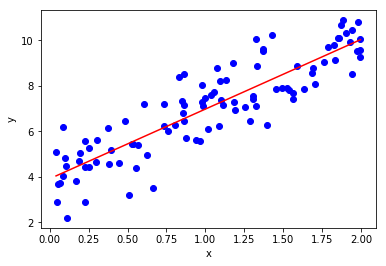

In [5]:
# Plot the regression line
minX,maxX = min(X),max(X)

X_test = [minX, maxX]
y_pred = model.predict(X_test)

plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_test, y_pred, 'r-');

### Linear regression using statsmodels
To get more information about the fit, as different statistics, R-squared, confidence intervals, etc., we can use the statsmodels library.

In [6]:
import statsmodels.api as sm

# Prepare the features vector (add 1s on a separate column)
X = sm.add_constant(X)

# Instantiate the model
model = sm.OLS(y, X)   # Note that OLS requires the dependent variable before the features

# Fit the model
model = model.fit()

# Print the summary of the fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     352.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           3.19e-34
Time:                        13:59:36   Log-Likelihood:                -139.05
No. Observations:                 100   AIC:                             282.1
Df Residuals:                      98   BIC:                             287.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9146      0.194     20.225      0.000       3.530       4.299
x1             3.0599      0.163     18.771      0.000       2.736       3.383
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.334
Skew:                          -0.002   Prob(JB):                        0.846
Kurtosis:                       2.717   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Print just the fitted parameters
model.params

array([3.91455526, 3.05994889])

We obtained again that the best fit line is $y\approx 3x+4$.

### Regularized linear models
To reduce overfitting, we can use regularized linear models, where instead of minimizing the mean squared error cost function, we minimize a regularized cost function. Examples of regularized regression models available in scikit-learn are: ridge regression, lasso regression, elastic net.

In [8]:
# Get rid of the constant column
X = X[:,[1]]

In [9]:
model_label = ['Ridge regression', 'Lasso regression', 'Elastic Net']
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Instantiate the models
reg_models = [Ridge(),
              Lasso(alpha=0.1),
              ElasticNet(alpha=0.1, l1_ratio=0.5)]

# Fit the models
for i in range(3):
    reg_models[i].fit(X,y)

Ridge regression
Fitted slope: [[2.97785213]]
Fitted intercept: [3.99855787]
 
Lasso regression
Fitted slope: [2.78425771]
Fitted intercept: [4.19664653]
 
Elastic Net
Fitted slope: [2.56810179]
Fitted intercept: [4.41782044]
 


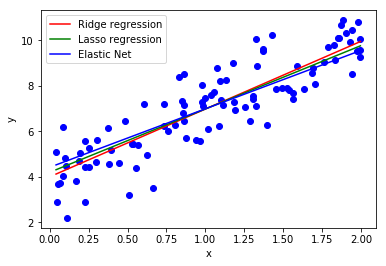

In [10]:
# Check the results
for i in range(3):
    print(model_label[i])
    print('Fitted slope: {}'.format(reg_models[i].coef_))
    print('Fitted intercept: {}'.format(reg_models[i].intercept_))
    print(' ')
    
# Plot the regression lines
minX,maxX = min(X),max(X)

X_test = [minX, maxX]
y_pred_Ridge = reg_models[0].predict(X_test)
y_pred_Lasso = reg_models[1].predict(X_test)
y_pred_ElasticNet = reg_models[2].predict(X_test)

plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_test, y_pred_Ridge, 'r-', label=model_label[0])
plt.plot(X_test, y_pred_Lasso, 'g-', label=model_label[1])
plt.plot(X_test, y_pred_ElasticNet, 'b-', label=model_label[2])
plt.legend();

### Polynomial regression

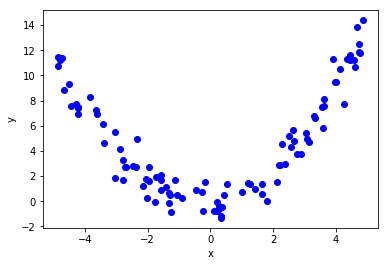

In [11]:
# Generate some data
X = 10 * np.random.rand(100,1) - 5
y = 0.5 * X**2 + 0.3 * X + np.random.randn(100,1)

plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y');

In [12]:
# Fit a polynomial model

# Construct the X**2 feature from the original feature X
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a linear model using features X and X**2
model = LinearRegression().fit(X_poly, y)

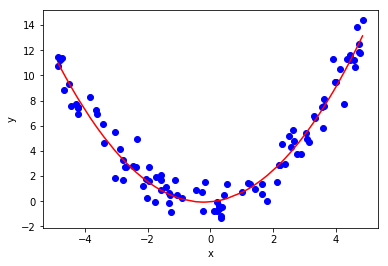

In [13]:
# Check the fit
# Sort the features by X value
X_test = X_poly[X_poly[:,0].argsort()]
y_pred = model.predict(X_test)

plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_test[:,0], y_pred, 'r-');

In [14]:
# Print the fitted parameters
print('Feature coefficients: {}'.format(model.coef_))
print('Intercept: {}'.format(model.intercept_))

Feature coefficients: [[0.2250834 0.5122496]]
Intercept: [-0.04764254]


We obtained the best fit line $y\approx -0.07 + 0.32 x + 0.49 x^2$.